In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.stats as stats
import pynbody as pb
import glob
import os
import re

# Glob + Regex to get the paths

In [4]:
all_paths = glob.glob('/mnt/storage/_data/nihao/nihao_classic/g*/0*/*.*.*')
# Regular expression to match files that end with 5 numbers and don't have a dot at the end

regex = r'^.*\d{5}$' #all the snapshots


# Filter the list of files
paths = [path for path in all_paths if re.match(regex, path)]
len(paths)

5770

# Pynbody extraction 

In [5]:
def extract_parameter(path='str'):
    """
    Extract the parameter from the path
    """
    sim = pb.load(path)
    sim.physical_units()
    h = sim.halos(write_fpos=False)
    pb.analysis.angmom.faceon(h[1])
    disk_filt = pb.filt.LowPass('r', '30.00 kpc')
    if len(sim.s['mass']) > 0:
        theta = {'star_mass': sim.s['mass'].sum(),
                'gas_mass': sim.g['mass'].sum(),
                'dm_mass': sim.dm['mass'].sum(),
                'infall_time': sim.properties['time'].in_units('Gyr'),
                'redshift': sim.properties['z'],
                'a':sim.properties['a'], 
                'chemical_mean':np.array([sim.s['metals'].mean(), sim.s['FeMassFrac'].mean(), sim.s['OxMassFrac'].mean()]),
                'chemical_std':np.array([sim.s['metals'].std(), sim.s['FeMassFrac'].std(), sim.s['OxMassFrac'].std()])}
        feh = sim.s['feh']
        ofe = sim.s['ofe']
        observable = {'feh': feh,
                     'ofe': ofe}
        return path, sim, theta, observable
    else:
        print('Not formed stars yet')

In [29]:
path, sim, theta, observable   = extract_parameter(paths[3500])
print(path)

pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.


/mnt/storage/_data/nihao/nihao_classic/g4.90e11/00816/g4.90e11.00816


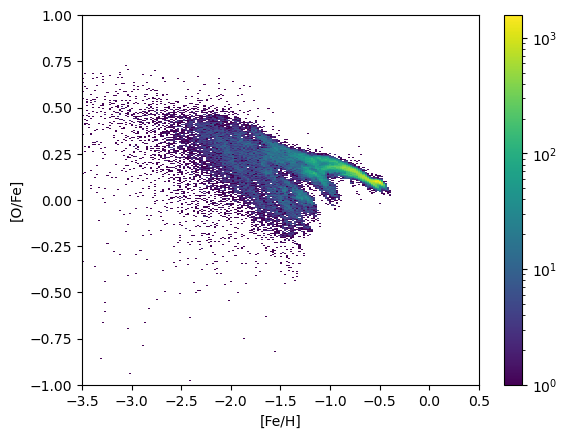

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.hist2d(observable['feh'], observable['ofe'], bins=(2000, 2000), norm=colors.LogNorm());
fig.colorbar(cax[3], ax=ax)
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_xlim(-3.5, 0.5) 
ax.set_ylim(-1, 1.0);